# **[GD-4] Vocabulary Size 변경해서 시도해보기**
---

# **🗼 목차**
1. 라이브러리 불러오기
2. 다양한 단어 갯수 사용하여 머신러닝 모델 학습
3. 딥러닝 모델 학습 (RNN 모델)
4. F1-Score, Confusion Matrix
5. 🌞 회고

    

> Case 1. 모든 단어 사용  
> Case 2. 빈도수 상위 5,000개의 단어 사용  
> Case 3. 빈도수 상위 15,000개의 단어만 사용  
> Case 4. 빈도수 상위 20,000개의 단어만 사용


# **라이브러리 불러오기**
---

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import tensorflow
import sklearn

# **Case 1. 모든 단어 사용**
---

## **1) 데이터 확인하기**

텐서플로우 데이터셋으로부터 `로이터 뉴스 데이터`를 받아오자.

In [2]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)

- `num_words`는 데이터에서 빈도수 기준으로 상위 몇 번째 단어까지 사용할 것인지 조절한다.
- 이 데이터의 단어들은 등장 빈도수가 높은 순서대로 낮은 정수가 맵핑되어 있다.
- `num_words`로 주어진 값보다 큰 번호를 가졌던 단어들은 특정 번호로 전부 맵핑된다. 이는 OOV 문제와 연관이 있다.

In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


데이터를 출력해보자.

In [4]:
print(x_train[0])
print(x_test[0])

[1, 27595, 28842, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 23406, 28185, 5, 192,

- 텍스트가 아닌 숫자 시퀀스가 출력되는 것을 확인할 수 있다.
- 이미 뉴스 데이터를 다운로드할 때 단어가 아니라 맵핑된 번호로 변환되어서 출력된다.
- 대부분 자연어 처리에서는 텍스트를 숫자로 수치화하는 과정이 필요한데, 텐서플로우 데이터셋에서는 이미 전처리를 한 데이터를 제공해준다.

첫 번째 훈련용 뉴스와 테스트용 뉴스의 레이블을 출력해보자.

In [5]:
print(y_train[0])
print(y_test[0])

3
3


해당 데이터의 클래스의 수를 확인해보자.

In [6]:
num_classes = max(y_train) + 1       # 레이블이 0부터 시작하기에 갯수를 확인하기 위해서는 1을 더함
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


데이터의 길이 분포를 히스토그램으로 확인해보자.

훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


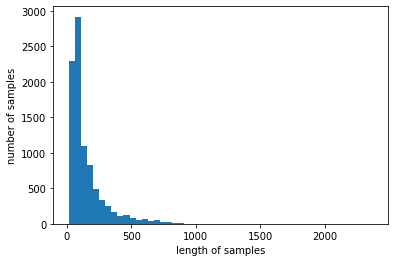

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

우리가 맞춰야 하는 클래스의 분포를 확인해보자.

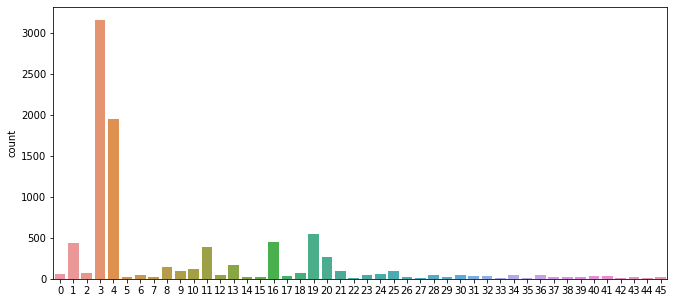

In [8]:
fig, axe = plt.subplots(ncols=1)

fig.set_size_inches(11,5)
sns.countplot(x=y_train)

plt.show()

- 해당 데이터는 3번, 4번 클래스가 대부분을 차지한다.

수치적으로 클래스 별 빈도수가 몇인지 확인해보자.

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True) # return_counts가 True이면 각 고유 값의 개수 배열을 반환
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


- 3번, 4번 클래스가 각 3159, 1949로 빈도수가 높은 것을 수치적으로도 확인할 수 있다.
- 16번, 19번 클래스도 각 444, 549로 3번, 4번 다음으로 빈도수가 높다.

## **2) 데이터 복원하기**

- 로이터 뉴스 데이터가 텍스트가 아닌 숫자 시퀀스로 출력되었다.
- 정수 시퀀스로 변환된 데이터를 다시 텍스트로 복원하는 과정을 진행해보자.

로이터 뉴스 데이터는 '단어'를 key값으로, 고유한 '정수'를 value로 가지는 dictionary를 제공하는데, 이것을 `word_index`로 저장해보자.

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

=3


`word_index`는 해당 데이터의 단어장(Vocabulary)으로 단어를 입력하면 그 단어가 어떤 정수와 맵핑되는지 확인할 수 있다.

In [11]:
word_index['the']

1

In [12]:
word_index['it']

13

`word_index`에 입력으로 했을 때, 얻은 숫자보다는 +3을 한 숫자가 원래 고유한 숫자이기에 `word_index`에서 `index_word`를 만들 때 각 정수에 +3을 해주면 된다.

In [13]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [14]:
print(index_to_word[4])
print(index_to_word[16])

the
it


0번, 1번, 2번은 각각 `<pad>`, `<sos>`, `<unk>`라는 자연어 처리를 위한 특별한 토큰을 위해 맵핑된 번호이기에 `index_to_word`에 추가적으로 해당 작업을 해주어야 한다.

In [15]:
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_to_word[index]=token
print('=3')

=3


`index_to_word`를 통해 첫 번째 훈련용 뉴스 기사를 텍스트로 복원해보자.

In [16]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


- 데이터가 어느정도 전처리가 되어있는 상태라 자연스럽게 읽히지는 않는다.
- 그러나 문맥을 가진 텍스트이기에 해당 데이터로 진행해도 된다.

전체 훈련용 뉴스 데이터와 테스트용 뉴스 데이터를 텍스트 데이터로 변환해보자.

In [17]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [18]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [19]:
x_train[:5]

['<sos> mcgrath rentcorp said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 "<sos> generale de banque sa lt genb br and lt heller overseas corp of chicago have each taken 50 pct stakes in factoring company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo factors' turnover in 1986 was 17 5 billion belgian francs reuter 3",
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect th

In [20]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to accommodate growth and expansion plans for waldbaum inc and shopwell inc over the next two years a and p said the acquisition of shopwell in august 1986 and waldbaum in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt tengelmann warenhandelsgesellschaft of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration sra chairman arsenio yulo said yu

## **3) 벡터화하기**

이번 실습에서는 머신러닝 방법을 사용하여 텍스트 분류를 진행할 것이기에 벡터화 방법도 인공 신경망이 아닌 방법을 사용한다.  
Bag of Words 가설을 기반으로 하는 `DTM, TF-IDF 행렬`로 벡터화를 할 예정이다.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


`DTM`은 사이킷런의 `CountVectorizer()`를 통해서 생성할 수 있다.

In [22]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 26506)


- 훈련용 뉴스의 수가 8,982개였기에 DTM의 행의 개수는 8,982개이다.

`TF-IDF Matrix`는 사이킷런의 `TfidfTransformer()`를 통해 생성할 수 있다.

In [23]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 26506)


- TF-IDF는 추가적인 전처리를 하지 않는 이상, DTM과 동일한 크기를 가진다.

## **4) 머신러닝 모델 학습**
총 8개의 모델을 사용해서 학습 후 성능을 확인해보자.
- 나이브 베이즈 분류기
- CNB (Complement Naive Bayes Classifier)
- 로지스틱 회귀 (Logistic Regression)
- 선형 서포트 벡터 머신 (Linear Support Vector Machine)
- 결정 트리 (Decision Tree)
- 랜덤 포레스트 (Random Forest)
- 그래디언트 부스팅 트리 (Gradient Boosting Classifier)
- 보팅 (Voting)

### **4.1) 나이브 베이즈 분류기**

In [24]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


나이브 베이즈 분류기는 사이킷런의 `MultinomialNB()`를 통해 사용할 수 있다.  
(사이킷런의 머신러닝 모델들은 `fit()`함수를 제공한다. 훈련 데이터와 레이블을 인자로 사용하면 모델이 이를 학습한다.)

In [25]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

테스트 데이터에 대한 정확도를 측정하기 위해서는 훈련데이터와 동일한 전처리를 해야한다. (TD-IDF 행렬로 변환해야 함)

In [26]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_test.shape)

(2246, 26506)


해당 행렬과 `predict()`함수를 통해 예측값을 얻어 정확도를 측정해보자.

In [27]:
predicted = model.predict(tfidfv_test)           # 테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted))      # 예측값과 실제값 비교

정확도: 0.5997328584149599


나이브 베이즈 분류기가 임의의 샘플에 대해 클래스를 정확히 예측하는지 테스트를 해보자.

In [28]:
x_test[3]

'<sos> graham mccormick oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north rucias fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to prepay principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the noteholders exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

4번째 샘플(인덱스 3)의 레이블을 확인해보자.

In [29]:
y_test[3]

4

모델이 제대로 예측하고 있는지, 어느 정도의 확신을 가지고 판단하는지 모델이 결정한 확률을 시각화하여 확인해보자.

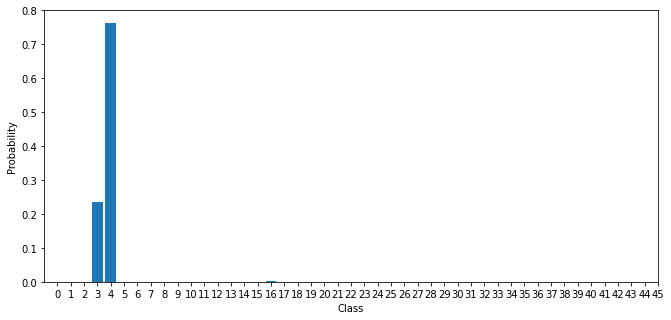

In [30]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [31]:
model.predict(tfidfv_test[3])

array([4])

- 모델이 4번 클래스를 약 80%의 확률로 확신한다.
- 20%의 확률로 3번 클래스라고 판단한다.
- 모델이 정확하게 예측한 것을 확인할 수 있다.

### **4.2) CNB**
- `나이브 베이지안 분류기`는 독립 변수가 '조건부로 독립적'이라는 가정을 하기 때문에, 문서가 특정 분류에 속할 실제 확률을 사용할 때 문제가 발생할 수 있다.
- 많은 샘플이 특정 클래스에 치우쳐져 있을 경우, 결정 경계의 가중치가 한쪽으로 치우쳐져 모델이 특정 클래스를 선호할 수 있다.


- CNB는 데이터의 불균형을 고려하여 가중치를 부여한다.
- 따라서 컴플리먼트 나이브 베이즈 분류기(CNB)가 나이브 베이즈 분류기보다 성능이 일반적으로 더 좋다.

In [32]:
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [33]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7649154051647373


### **4.3) 로지스틱 회귀**
- 로지스틱 회귀는 `소프트맥스(softmax)`함수를 사용한 다중 클래스 분류 알고리즘을 지원한다.
- 다중 클래스 분류를 위한 로지스틱 회귀를 `소프트맥수 회귀(Softmax Regression)`이라고 한다.
- 주의할 점은 이름은 회귀지만, 실제로는 분류를 수행한다.

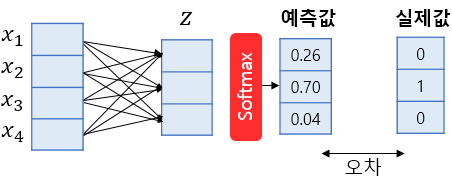

- 소프트맥스 함수는 클래스가 N개일 때, N차원의 벡터가 '각 클래스가 정답일 확률'을 표현하도록 정규화해주는 함수이다.
- 위의 이미지는 4차원의 벡터를 입력받으면서 3개의 클래스를 가지는 경우의 소프트맥스 회귀의 동작 과정이다.
- 3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원 벡터고, 각 벡터의 차원은 특정 클래스일 확률이다.
- 오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습된다.

사이킷런에서 소프트맥스 회귀는 `LogisticRegression()`을 통해서 구현할 수 있다.

In [34]:
lr = LogisticRegression(C=10000, penalty='l2')
lr.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=10000)

In [35]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.813446126447017


### **4.4) 선형 서포트 벡터 머신**
- 서포트 벡터 머신에서 서포트 벡터란, Decision Boundary와 가장 가까운 각 클래스의 데이터이다. (Decision Boundary에 해당되는 벡터가 아님)
- 서포트 벡터 머신의 구현체인 사이킷런의 `LinearSVC`도 태생적으로 이진 분류를 위한 모델이다.
- 그런데 이진 분류 알고리즘을 다중 클래스 분류 알고리즘으로 사용하는 방법이 있는데, 일대다(one- vs -rest 또는 one- vs -all) 방법이다.
- 일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킨다.
- 클래스의 수만큼 이진 분류 모델이 만들어진다.
- 예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택한다.

In [36]:
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
lsvc.fit(tfidfv, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC(C=1000, dual=False, max_iter=500, penalty='l1')

In [37]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.782279608192342


### **4.5) 결정 트리**
- 결정트리는 분류와 회귀 문제에 널리 사용하는 모델이다.
- 사이킷런에서는 `DecisionTreeClassifier()`를 사용하여 결정 트리를 구현할 수 있다.
- 결정트리의 깊이는 `max_depth`라는 인자를 통해서 정해줄 수 있다.

In [38]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [39]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6211041852181657


- 트리 계열의 모델들은 고차원이고 희소한 데이터에 대해서는 성능이 나오지 않는다는 특징이 있다.
- DTM이나 TF-IDF 행렬의 경우, 고차원이면서 대부분의 값이 0인 희소한 데이터이므로 트리 계열의 모델보다는 선형 분류 모델을 통해 접근하는 것이 더 나은 접근일 수 있다.

### **4.6) 랜덤 포레스트**
- 결정 트리는 훈련 데이터에 과적합(Overfitting)되는 경향이 있다.
- 랜덤 포레스트는 이 문제를 앙상블로 해결한다.
- 서로 다른 방향으로 과적합된 트리들을 조합하면 오히려 모델 전체에서는 과적합을 피할 수 있다.

In [40]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [41]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6544968833481746


### **4.7) 그래디언트 부스팅 트리**
- 그래디언트 부스팅 트리는 여러 개의 결정 트리를 묶어 만드는 앙상블 모델이다.
- 랜덤 포레스트와 다르게 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만든다.
- 그래디언트 부스팅 트리는 일부 특성을 무시한다는 특징을 가지고 있다.
- 그래서 보통 랜덤 포레스트를 먼저 사용해보고 성능이나 예측 시간 면에서 만족스럽지 않은 경우에 그래디언트 부스팅 트리를 시도해보는 것이 좋다.
- 일반적으로 1 ~ 5 정도의 깊지 않은 트리를 사용하므로 메모리도 적게 사용하고 예측도 빠르다.
- 정확도도 준수하지만 훈련 시간의 속도가 오래걸리고 트리 기반 모델의 특성으로 희소한 고차원 데이터에 대해서는 잘 동작하지 않는다.

In [42]:
grbt = GradientBoostingClassifier(random_state=0) # verbose=3
grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [43]:
predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7702582368655387


### **4.8) 보팅**
- 보팅은 하드 보팅과 소프트 보팅 두 가지로 나누어진다.
- 하드 보팅은 결과물에 대한 최종값을 투표해서 결정한다.
- 소프트 보팅은 최종 결과물이 나올 확률값을 다 더해서 최종 결과물에 대한 각각의 확률을 구한 뒤 최종 값을 도출해 낸다.

In [44]:
voting_classifier = VotingClassifier(estimators=[
         ('lr', LogisticRegression(C=10000, penalty='l2')),
        ('cb', ComplementNB()),
        ('grbt', GradientBoostingClassifier(random_state=0))
], voting='soft', n_jobs=-1)
voting_classifier.fit(tfidfv, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=10000)),
                             ('cb', ComplementNB()),
                             ('grbt',
                              GradientBoostingClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [45]:
predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8187889581478184


# **Case 2. 빈도수 상위 5,000개의 단어 사용**
---

## **1) 데이터 로드하기**
빈도수 상위 5,000개의 단어만을 사용할 것이기 때문에 `num_words`을 5,000으로 설정해준다.

In [46]:
(x_train_5k, y_train_5k), (x_test_5k, y_test_5k) = reuters.load_data(num_words=5000, test_split=0.2)

In [47]:
print('훈련 샘플의 수: {}'.format(len(x_train_5k)))
print('테스트 샘플의 수: {}'.format(len(x_test_5k)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


## **2) 데이터 복원하기**  
전체 훈련용 뉴스 데이터와 테스트용 뉴스 데이터를 텍스트 데이터로 변환해보자.

In [48]:
decoded = []
for i in range(len(x_train_5k)):
    t = ' '.join([index_to_word[index] for index in x_train_5k[i]])
    decoded.append(t)

x_train_5k = decoded
print(len(x_train_5k))

8982


In [49]:
decoded = []
for i in range(len(x_test_5k)):
    t = ' '.join([index_to_word[index] for index in x_test_5k[i]])
    decoded.append(t)

x_test_5k = decoded
print(len(x_test_5k))

2246


## **3) 벡터화하기**

`DTM`을 생성해보자.

In [50]:
dtmvector = CountVectorizer()
x_train_5k_dtm = dtmvector.fit_transform(x_train_5k)
print(x_train_5k_dtm.shape)

(8982, 4867)


- 열의 개수는 5,000보다 작은 9,670개인데, 그 이유는 DTM이 자체적인 규칙에 따라 불필요하다고 판단하는 토큰들을 제거하기 때문이다.

`TF-IDF`를 생성해보자.

In [51]:
tfidf_transformer = TfidfTransformer()
tfidfv_5k = tfidf_transformer.fit_transform(x_train_5k_dtm)
print(tfidfv_5k.shape)

(8982, 4867)


테스트 데이터에 대한 정확도를 측정하기 위해서는 훈련데이터와 동일한 전처리를 해야한다.

In [52]:
x_test_5k_dtm = dtmvector.transform(x_test_5k) #테스트 데이터를 DTM으로 변환
tfidfv_5k_test = tfidf_transformer.transform(x_test_5k_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_5k_test.shape)

(2246, 4867)


## **4) 머신러닝 모델 학습**

In [53]:
def ml_model(tfidfv, y_train, tfidfv_test, y_test):
    # 나이브 베이즈 분류기
    nb = MultinomialNB()
    nb.fit(tfidfv, y_train)
    nb_predicted = nb.predict(tfidfv_test)      # 테스트 데이터에 대한 예측
    print('나이브 베이즈 분류기 정확도 : ', accuracy_score(y_test, nb_predicted))   # 예측값과 실제값 비교

    # CNB
    cb = ComplementNB()
    cb.fit(tfidfv, y_train)
    cb_predicted = cb.predict(tfidfv_test)
    print("CNB 정확도:", accuracy_score(y_test, cb_predicted))

    # 로지스틱 회귀
    lr = LogisticRegression(C=10000, penalty='l2')
    lr.fit(tfidfv, y_train)
    lr_predicted = lr.predict(tfidfv_test)
    print("로지스틱 회귀 정확도:", accuracy_score(y_test, lr_predicted))

    # LSVM
    lsvc = LinearSVC(C=1000, penalty='l1', max_iter=500, dual=False)
    lsvc.fit(tfidfv, y_train)
    lsvc_predicted = lsvc.predict(tfidfv_test)
    print("LSVM 정확도:", accuracy_score(y_test, lsvc_predicted))

    # 결정 트리
    tree = DecisionTreeClassifier(max_depth=10, random_state=0)
    tree.fit(tfidfv, y_train)
    tree_predicted = tree.predict(tfidfv_test)
    print("결정 트리 정확도:", accuracy_score(y_test, tree_predicted))

    # 랜덤 포레스트
    forest = RandomForestClassifier(n_estimators=5, random_state=0)
    forest.fit(tfidfv, y_train)
    forest_predicted = forest.predict(tfidfv_test)
    print("랜덤 포레스트 정확도:", accuracy_score(y_test, forest_predicted))

    # 그래디언트 부스팅 트리
    grbt = GradientBoostingClassifier(random_state=0)
    grbt.fit(tfidfv, y_train)
    grbt_predicted = grbt.predict(tfidfv_test)
    print("그래디언트 부스팅 트리 정확도:", accuracy_score(y_test, grbt_predicted))

    # 보팅
    voting_classifier = VotingClassifier(estimators=[
                                                     ('lr', LogisticRegression(C=10000, penalty='l2')),
                                                     ('cb', ComplementNB()),
                                                     ('grbt', GradientBoostingClassifier(random_state=0))
                                                     ], voting='soft', n_jobs=-1)
    voting_classifier.fit(tfidfv, y_train)
    voting_predicted = voting_classifier.predict(tfidfv_test)
    print("보팅 정확도:", accuracy_score(y_test, voting_predicted))

    return nb, cb, lr, lsvc, tree, forest, grbt, voting_classifier

In [54]:
nb_5k, cb_5k, lr_5k, lsvc_5k, tree_5k, forest_5k, grbt_5k, voting_classifier_5k = ml_model(tfidfv_5k, y_train_5k, tfidfv_5k_test, y_test_5k)

나이브 베이즈 분류기 정확도 :  0.6731967943009796
CNB 정확도: 0.7707034728406055


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8058771148708815


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LSVM 정확도: 0.763579697239537
결정 트리 정확도: 0.6179875333926982
랜덤 포레스트 정확도: 0.701246660730187
그래디언트 부스팅 트리 정확도: 0.767586821015138
보팅 정확도: 0.8161175422974176


# **Case 3. 빈도수 상위 15,000개의 단어만 사용**
---

## **1) 데이터 로드하기**
빈도수 상위 15,000개의 단어만을 사용할 것이기 때문에 `num_words`을 15,000으로 설정해준다.

In [55]:
(x_train_15k, y_train_15k), (x_test_15k, y_test_15k) = reuters.load_data(num_words=15000, test_split=0.2)

In [56]:
print('훈련 샘플의 수: {}'.format(len(x_train_15k)))
print('테스트 샘플의 수: {}'.format(len(x_test_15k)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


## **2) 데이터 복원하기**

In [57]:
decoded = []
for i in range(len(x_train_15k)):
    t = ' '.join([index_to_word[index] for index in x_train_15k[i]])
    decoded.append(t)

x_train_15k = decoded
print(len(x_train_15k))

8982


In [58]:
decoded = []
for i in range(len(x_test_15k)):
    t = ' '.join([index_to_word[index] for index in x_test_15k[i]])
    decoded.append(t)

x_test_15k = decoded
print(len(x_test_15k))

2246


## **3) 벡터화하기**

In [59]:
dtmvector = CountVectorizer()
x_train_15k_dtm = dtmvector.fit_transform(x_train_15k)
print(x_train_15k_dtm.shape)

(8982, 14227)


In [60]:
tfidf_transformer = TfidfTransformer()
tfidfv_15k = tfidf_transformer.fit_transform(x_train_15k_dtm)
print(tfidfv_15k.shape)

(8982, 14227)


In [61]:
x_test_15k_dtm = dtmvector.transform(x_test_15k) #테스트 데이터를 DTM으로 변환
tfidfv_15k_test = tfidf_transformer.transform(x_test_15k_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_15k_test.shape)

(2246, 14227)


## **4) 머신러닝 모델 학습**

In [62]:
nb_15k, cb_15k, lr_15k, lsvc_15k, tree_15k, forest_15k, grbt_15k, voting_classifier_15k = ml_model(tfidfv_15k, y_train_15k, tfidfv_15k_test, y_test_15k)

나이브 베이즈 분류기 정확도 :  0.6331255565449688
CNB 정확도: 0.7720391807658059


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8125556544968834


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LSVM 정확도: 0.7715939447907391
결정 트리 정확도: 0.6193232413178985
랜덤 포레스트 정확도: 0.6714158504007124
그래디언트 부스팅 트리 정확도: 0.7707034728406055
보팅 정확도: 0.8165627782724845


# **Case 4. 빈도수 상위 20,000개의 단어만 사용**
---

## **1) 데이터 로드하기**
빈도수 상위 20,000개의 단어만을 사용할 것이기 때문에 `num_words`을 20,000으로 설정해준다.

In [63]:
(x_train_20k, y_train_20k), (x_test_20k, y_test_20k) = reuters.load_data(num_words=20000, test_split=0.2)

In [64]:
print('훈련 샘플의 수: {}'.format(len(x_train_20k)))
print('테스트 샘플의 수: {}'.format(len(x_test_20k)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


## **2) 데이터 복원하기**

In [65]:
decoded = []
for i in range(len(x_train_20k)):
    t = ' '.join([index_to_word[index] for index in x_train_20k[i]])
    decoded.append(t)

x_train_20k = decoded
print(len(x_train_20k))

8982


In [66]:
decoded = []
for i in range(len(x_test_20k)):
    t = ' '.join([index_to_word[index] for index in x_test_20k[i]])
    decoded.append(t)

x_test_20k = decoded
print(len(x_test_20k))

2246


## **3) 벡터화하기**

In [67]:
dtmvector = CountVectorizer()
x_train_20k_dtm = dtmvector.fit_transform(x_train_20k)
print(x_train_20k_dtm.shape)

(8982, 18479)


In [68]:
tfidf_transformer = TfidfTransformer()
tfidfv_20k = tfidf_transformer.fit_transform(x_train_20k_dtm)
print(tfidfv_20k.shape)

(8982, 18479)


In [69]:
x_test_20k_dtm = dtmvector.transform(x_test_20k) #테스트 데이터를 DTM으로 변환
tfidfv_20k_test = tfidf_transformer.transform(x_test_20k_dtm) #DTM을 TF-IDF 행렬로 변환
print(tfidfv_20k_test.shape)

(2246, 18479)


## **4) 머신러닝 모델 학습**

In [70]:
nb_20k, cb_20k, lr_20k, lsvc_20k, tree_20k, forest_20k, grbt_20k, voting_classifier_20k = ml_model(tfidfv_20k, y_train_20k, tfidfv_20k_test, y_test_20k)

나이브 베이즈 분류기 정확도 :  0.6193232413178985
CNB 정확도: 0.7671415850400712


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀 정확도: 0.8098842386464826


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LSVM 정확도: 0.7742653606411398
결정 트리 정확도: 0.6211041852181657
랜덤 포레스트 정확도: 0.6714158504007124
그래디언트 부스팅 트리 정확도: 0.7702582368655387
보팅 정확도: 0.8178984861976848


---

# **딥러닝 모델 학습 (RNN 모델)**
---

In [72]:
import tensorflow as tf

In [73]:
vocab_size = 20000   # 단어사진 크기
word_vector_dim = 32  # 단어 하나를 표현하는 임베딩 벡터의 차원수 (변경 가능한 하이퍼파라마터)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim))
model.add(tf.keras.layers.LSTM(32))  # LSTM 레이어 사용 & LSTM 벡터의 차원 수 변경 가능
model.add(tf.keras.layers.Dense(8, activation = 'relu'))
model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          640000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 46)                414       
                                                                 
Total params: 648,998
Trainable params: 648,998
Non-trainable params: 0
_________________________________________________________________


In [74]:
print(tfidfv_20k.shape)
print(y_train_20k.shape)

(8982, 18479)
(8982,)


딥러닝 모델을 학습하기 위해 `validation 데이터셋`을 만들어보자.

In [75]:
from sklearn.model_selection import train_test_split

tfidfv_20k, tfidfv_20k_val, y_train_20k, y_val_20k = train_test_split(tfidfv_20k, y_train_20k, test_size = 0.2)

데이터를 분리한 후의 train 데이터셋 크기와 val 데이터셋 크기를 확인해보자.

In [76]:
print(tfidfv_20k.shape)
print(y_train_20k.shape)

(7185, 18479)
(7185,)


In [77]:
print(tfidfv_20k_val.shape)
print(y_val_20k.shape)

(1797, 18479)
(1797,)


아래 모델 학습 시에 sparse matrix 관련한 문제가 발생하여 `tfidfv_20k`가 어떤 타입인지 확인해보았다.

In [78]:
tfidfv_20k

<7185x18479 sparse matrix of type '<class 'numpy.float64'>'
	with 560512 stored elements in Compressed Sparse Row format>

sparse matrix를 array로 모두 바꿔주자

In [79]:
tfidfv_20k_arr = tfidfv_20k.toarray()
tfidfv_20k_val_arr = tfidfv_20k_val.toarray()
tfidfv_20k_test_arr = tfidfv_20k_test.toarray()

array로 변경되었는지 확인해보자.

In [80]:
tfidfv_20k_arr

array([[0.        , 0.10378465, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

딥러닝 모델(RNN)을 학습시켜보자.

In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# model.compile(optimizer = 'adam',
#               loss = 'sparse_categorical_crossentropy',
#               metrics = ['accuracy'])

# epochs = 10

# es = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# history = model.fit(tfidfv_20k_arr,
#                     y_train_20k,
#                     epochs = epochs,
#                     batch_size = 64,
#                     callbacks=[es],
#                     validation_data = (tfidfv_20k_val_arr, y_val_20k),
#                     verbose=1)

- 모델을 학습하니 너~무 오래걸리거나 커널이 죽는 상황이 발생하여 결국 학습시키지 못하였다.

# **F1-Score, Confusion Matrix**
---

- 이번 실습에서는 성능 비교를 위한 척도로 `정확도(Accuracy)`를 사용한다. 
- 하지만 그 외에도 `F1-score`이 있다.
- [분류성능평가지표](https://sumniya.tistory.com/26)
- `accuracy`는 label의 불균형을 제대로 고려하지 못하기 때문에 label의 불균형을 고려한 `f1-score`를 사용하기도 한다.

In [81]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


사이킷런 `metrics` 패키지에서는 정밀도, 재현율, F1점수를 구하는 `classification_report()` 함수를 제공한다.  
가장 정확도가 높았던 `전체 단어를 활용한 voting 모델`의 F1점수를 구해보고자 한다.

In [87]:
print(classification_report(y_test, voting_classifier.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.80      0.77      0.79       105
           2       0.67      0.80      0.73        20
           3       0.93      0.94      0.93       813
           4       0.82      0.88      0.85       474
           5       1.00      0.20      0.33         5
           6       0.87      0.93      0.90        14
           7       1.00      0.33      0.50         3
           8       0.69      0.71      0.70        38
           9       0.80      0.80      0.80        25
          10       0.90      0.90      0.90        30
          11       0.67      0.71      0.69        83
          12       0.60      0.46      0.52        13
          13       0.69      0.65      0.67        37
          14       0.29      1.00      0.44         2
          15       0.40      0.22      0.29         9
          16       0.73      0.76      0.74        99
          17       0.75    

- `F1 score`로 0.82가 나왔다.

In [88]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
    df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
    fig = plt.figure(figsize=(12,12))
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
    plt.ylabel('label')
    plt.xlabel('predicted value')

print('=3')

=3


`Confusion Matrix`를 함수를 통해서 시각화해보자.

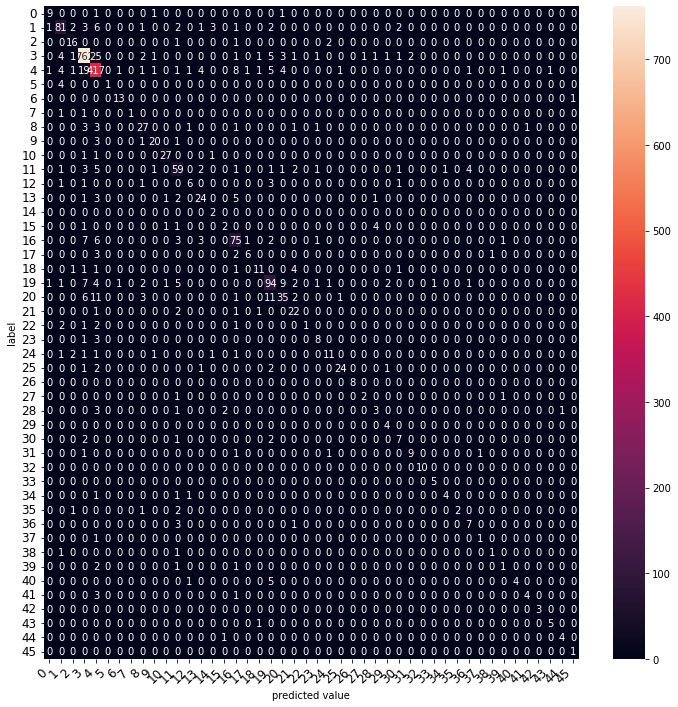

In [89]:
graph_confusion_matrix(voting_classifier, tfidfv_test, y_test)

- `label`이 3일 때, 3으로 예측한 개수와 4일 때 4로 예측한 개수가 많은 것을 그래프를 통해 확인할 수 있다.
- 대각선에 위치한 값이 높아야 예측이 잘 된다고 볼 수 있다.
- 해당 그래프를 보면 대각선에 위치한 값들이 전반적으로 높고 그 외의 값들은 0 또는 작은 값인 것을 알 수 있다.

# **🌞 회고**
---

## **1) 결과**
- 머신러닝 모델 총 8개를 학습하여 정확도를 확인해보았다.

| 모델 / num_words | 10000 | all | 5000 | 15000 | 20000 | 모델 별 평균 정확도 |
| --- | --- | --- | --- | --- | --- | --- |
| 나이브 베이즈 분류기 | 0.657 | 0.6 | 0.673 | 0.633 | 0.619 | 0.636 |
| CNB | 0.771 | 0.765 | 0.771 | 0.772 | 0.767 | 0.769 |
| 로지스틱 회귀 | 0.808 | 0.813 | 0.806 | 0.813 | 0.81 | 0.81 |
| LSVM | 0.772 | 0.782 | 0.764 | 0.772 | 0.774 | 0.773 |
| 결정트리 | 0.62 | 0.621 | 0.618 | 0.619 | 0.621 | 0.62 |
| 랜덤포레스트 | 0.674 | 0.654 | 0.701 | 0.671 | 0.671 | 0.675 |
| 그래디언트 부스팅 트리 | 0.766 | 0.77 | 0.768 | 0.771 | 0.77 | 0.769 |
| 보팅 | 0.812 | 0.819 | 0.816 | 0.817 | 0.818 | 0.816 |
| 개수 별 평균 정확도 | 0.735 | 0.728 | 0.74 | 0.733 | 0.731 |

- `num_words` 5,000개로 설정했을 때가 정확도 `0.74`로 가장 높은 것을 확인할 수 있다.
- 이 경우, `랜덤 포레스트 모델`에서 압도적으로 높은 정확도가 나와서 위와 같은 결론에 다다랐다.
- 모델 별로 확인해보았을 땐, `보팅(voting)`이 가장 정확도가 높은 모델임을 알 수 있다.

## **2) 아쉬웠던 점**
- 딥러닝 모델로 학습을 하려고 했으나 학습시간이 너무 오래 걸리거나 자꾸 커널이 꺼지는 문제가 발생하였다.
- 코랩 문제인가 해서 아이펠 클라우드 환경으로도 해보았지만 여전히 동일하게 문제가 발생해서... 결국 딥러닝 모델을 학습시키지 못하였다. (다음부턴 꼭 공지해주시길,,,)

## **3) 후기**
- 다양한 머신러닝 모델들을 알 수 있어서 좋았다.
- 다른 분의 코드를 참고하여 머신러닝 모델의 훈련과 예측을 함수로 구현해보았다.
- 앞으로의 프로젝트에서 스스로 함수 구현을 해보도록 노력해봐야겠다.
- `DTM`과 `TF-IDF`는 아직도 명확하게 이해가 되지 않아 좀 더 공부가 필요할 듯하다.